In [3]:
import pandas as pd
import networkx as nx #for analyse graph base networks
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm #to calculate stat SD
import statistics as stat #to calculate mean avg
import numpy as np
import seaborn as sns #data visualization
from collections import Counter #get count in Dic keys
import spacy #NLP 
from spacy import displacy #visualization
from community import community_louvain #find communities
from pyvis.network import Network #visualize network graphs

Load the Data

In [4]:

file_path = "facebook.txt"
edges = []
sr = []
tr = []
with open(file_path) as file:
    data = file.read()
data = data.split('\n')

for line in data:
    nodes = line.split(' ')
    edge = (nodes[0],nodes[1])
    sr.append(nodes[0])
    tr.append(nodes[1])
    edges.append(edge)
   

Store in a Dataframe

In [5]:
dataframe = pd.DataFrame({'source':sr,'target':tr,'value':1}) #add a weight value
dataframe.head()

,source,target,value
0,0,1,1
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1


In [6]:
dataframe = dataframe.groupby(["source","target"] , sort=False , as_index=False).count()

In [7]:
dataframe

,source,target,value
0,0,1,1
1,0,2,1
2,0,3,1
3,0,4,1
4,0,5,1
...,...,...,...
88229,4026,4030,1
88230,4027,4031,1
88231,4027,4032,1
88232,4027,4038,1


In [8]:
dataframe['value'].to_list

<bound method IndexOpsMixin.tolist of 0        1
1        1
2        1
3        1
4        1
        ..
88229    1
88230    1
88231    1
88232    1
88233    1
Name: value, Length: 88234, dtype: int64>

Define graph

In [9]:
G = nx.Graph(edges,edge_attr=dataframe['value'].to_list()) 

In [10]:
degree_size = list(dict(G.degree()).values())

calculate Degree frequent

In [11]:
degrees_freq = Counter(degree_size)
degs,frq = zip(*degrees_freq.items())

Plot the degree destribution

Text(0, 0.5, 'count')

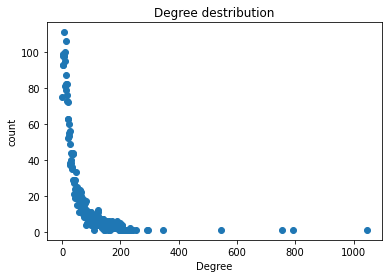

In [12]:
plt.scatter(degs,frq)
plt.title("Degree destribution")
plt.xlabel("Degree")
plt.ylabel("count")

Assign color based on degree 

In [13]:
color = []

for i in degree_size:
    if i > 750:
        color.append("red")
    elif i > 400:
        color.append("orange")
    elif i > 200 :
        color.append("yellow")
    else:
        color.append("blue")

In [14]:
len(color)

4039

plot the network

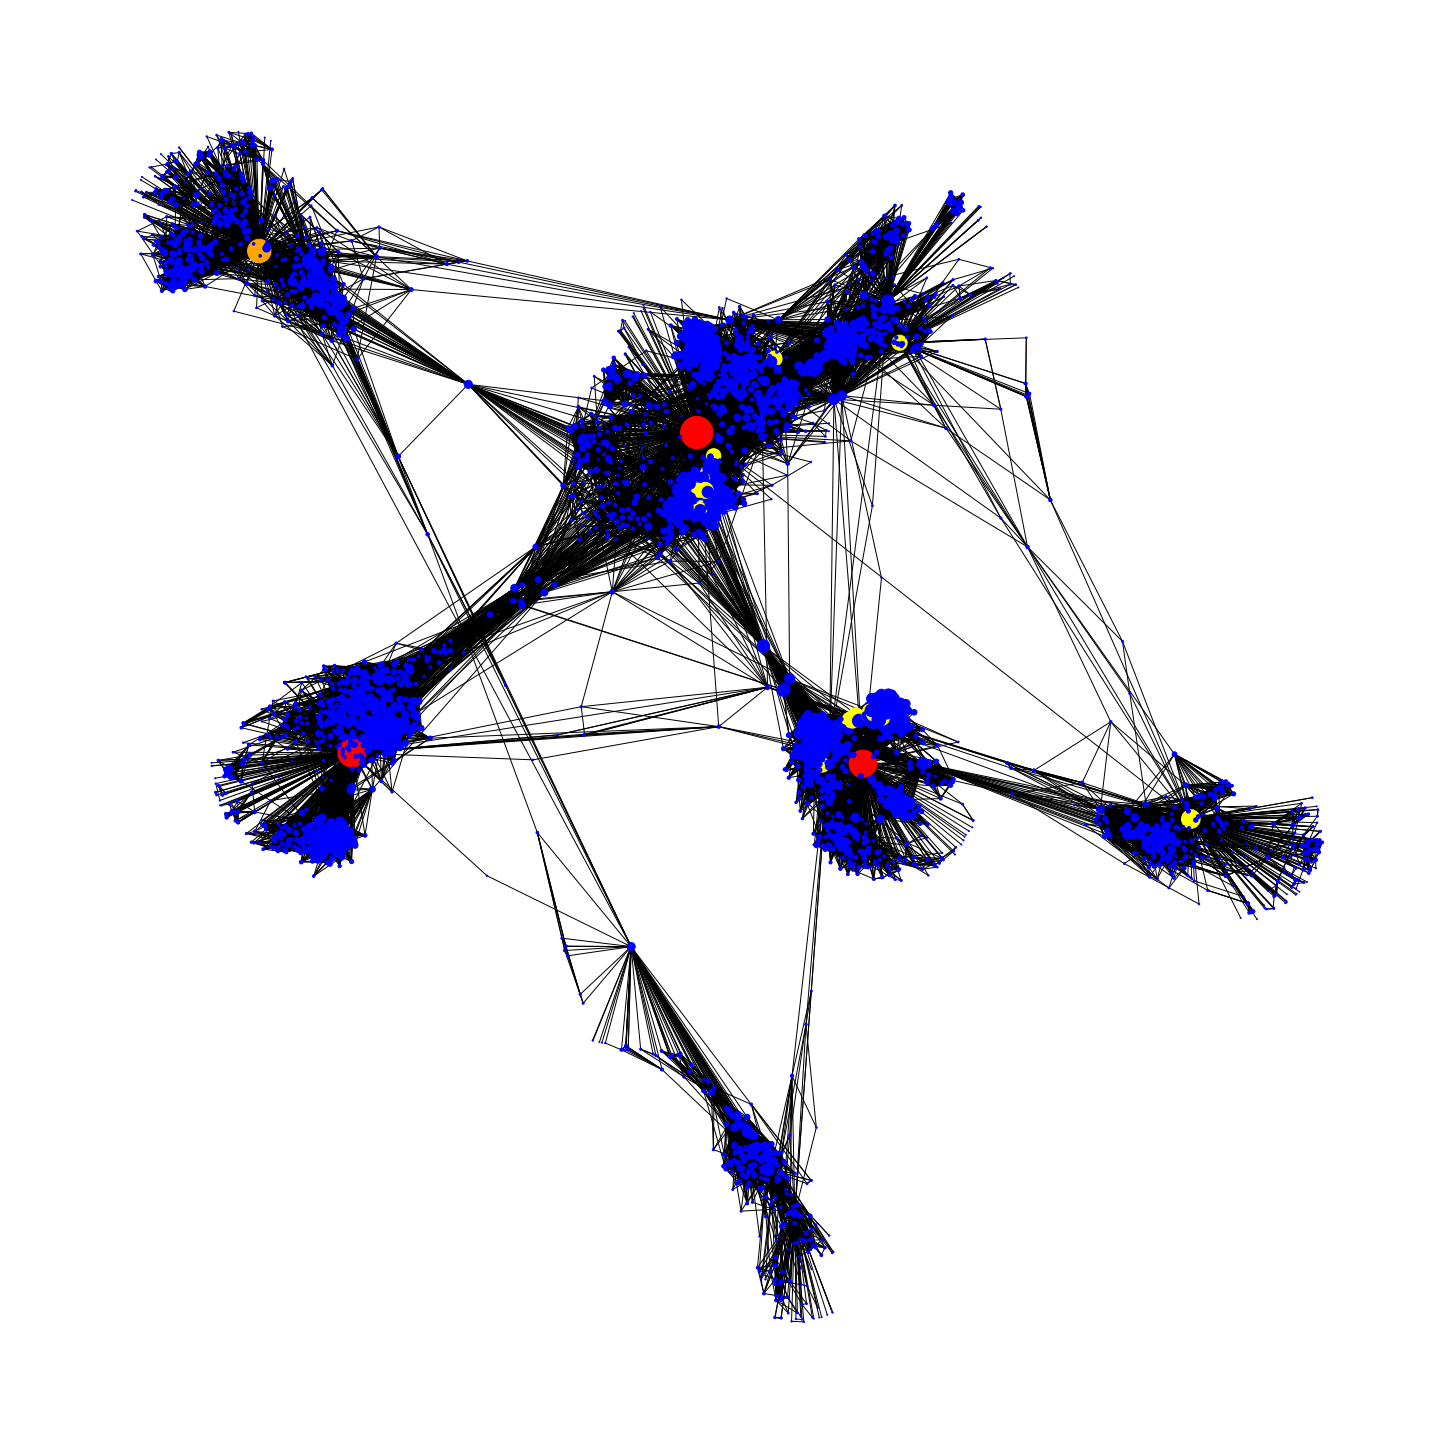

In [15]:
plt.figure(figsize=[20,20])
layout = nx.spring_layout(G)
nx.draw(G,pos=layout, node_size=[d for d in degree_size],node_color = color)

plot using network library

In [16]:
# net = Network( bgcolor='#222222', font_color='white')

# node_degree = dict(G.degree)

# #Setting up node size attribute
# nx.set_node_attributes(G, node_degree, 'size')

# net.from_nx(G)
# net.show("facebook.html")

calculate Degree centrality

In [17]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'0': 0.08593363051015354,
 '1': 0.004210004952947003,
 '2': 0.0024764735017335313,
 '3': 0.004210004952947003,
 '4': 0.0024764735017335313,
 '5': 0.0032194155522535907,
 '6': 0.0014858841010401188,
 '7': 0.004952947003467063,
 '8': 0.001981178801386825,
 '9': 0.014115898959881128,
 '10': 0.0024764735017335313,
 '11': 0.00024764735017335313,
 '12': 0.00024764735017335313,
 '13': 0.007677067855373947,
 '14': 0.003714710252600297,
 '15': 0.00024764735017335313,
 '16': 0.002228826151560178,
 '17': 0.0032194155522535907,
 '18': 0.00024764735017335313,
 '19': 0.00396235760277365,
 '20': 0.003714710252600297,
 '21': 0.016097077761267953,
 '22': 0.0027241208519068845,
 '23': 0.004210004952947003,
 '24': 0.00396235760277365,
 '25': 0.017087667161961365,
 '26': 0.016840019811788013,
 '27': 0.0012382367508667657,
 '28': 0.0032194155522535907,
 '29': 0.0032194155522535907,
 '30': 0.004210004952947003,
 '31': 0.005695889053987122,
 '32': 0.0014858841010401188,
 '33': 0.0004952947003467063,
 '34': 

find the best Influencer

<AxesSubplot:>

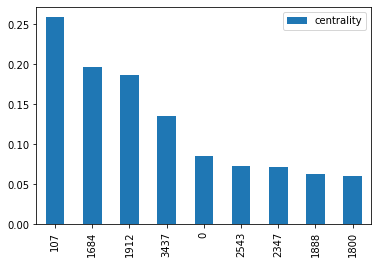

In [18]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [19]:
sorted_influ = degree_df.sort_values('centrality', ascending=False)[0:9]
list(sorted_influ.index) 

['107', '1684', '1912', '3437', '0', '2543', '2347', '1888', '1800']

In [20]:
[ int(l*10000) for l in sorted_influ.centrality]

[2587, 1961, 1869, 1354, 859, 728, 720, 629, 606]

Findt the best friends that can use as a bridges between communities

<AxesSubplot:>

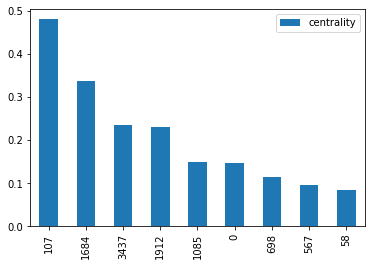

In [21]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [22]:
sorted_br = betweenness_df.sort_values('centrality', ascending=False)[0:9]

Find the best shortest distances

<AxesSubplot:>

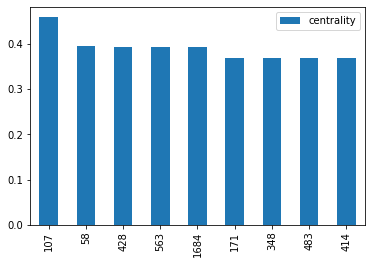

In [23]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [24]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

Generate communities using louvain algorithm

In [25]:
communities = community_louvain.best_partition(G)

In [26]:
communities

{'0': 0,
 '1': 0,
 '2': 0,
 '3': 0,
 '4': 0,
 '5': 0,
 '6': 0,
 '7': 0,
 '8': 0,
 '9': 0,
 '10': 0,
 '11': 0,
 '12': 0,
 '13': 0,
 '14': 0,
 '15': 0,
 '16': 0,
 '17': 0,
 '18': 0,
 '19': 0,
 '20': 0,
 '21': 0,
 '22': 0,
 '23': 0,
 '24': 0,
 '25': 0,
 '26': 0,
 '27': 0,
 '28': 0,
 '29': 0,
 '30': 0,
 '31': 0,
 '32': 0,
 '33': 0,
 '34': 1,
 '35': 0,
 '36': 0,
 '37': 0,
 '38': 0,
 '39': 0,
 '40': 0,
 '41': 0,
 '42': 0,
 '43': 0,
 '44': 0,
 '45': 0,
 '46': 0,
 '47': 0,
 '48': 0,
 '49': 0,
 '50': 0,
 '51': 0,
 '52': 0,
 '53': 0,
 '54': 0,
 '55': 0,
 '56': 0,
 '57': 0,
 '58': 0,
 '59': 0,
 '60': 0,
 '61': 0,
 '62': 0,
 '63': 0,
 '64': 0,
 '65': 0,
 '66': 0,
 '67': 0,
 '68': 0,
 '69': 0,
 '70': 0,
 '71': 0,
 '72': 0,
 '73': 0,
 '74': 0,
 '75': 0,
 '76': 0,
 '77': 0,
 '78': 0,
 '79': 0,
 '80': 0,
 '81': 0,
 '82': 0,
 '83': 0,
 '84': 0,
 '85': 0,
 '86': 0,
 '87': 0,
 '88': 0,
 '89': 0,
 '90': 0,
 '91': 0,
 '92': 0,
 '93': 0,
 '94': 0,
 '95': 0,
 '96': 0,
 '97': 0,
 '98': 0,
 '99': 0,
 '100': 0,

In [27]:
unique_communities = np.unique(list(communities.values()))
unique_communities

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

assign random colors to the communities

In [28]:
import random

number_of_colors = len(unique_communities)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#F52081', '#2BB01F', '#96EC3A', '#F96D54', '#DBC566', '#EE6787', '#440A9E', '#12493D', '#604ADB', '#5F1243', '#136852', '#C22833', '#85574F', '#A506DC', '#49EB7E', '#43A1D3']


In [29]:
colors = {}
i = 0
for c in color:
    colors[i] = c
    i +=1
colors

{0: '#F52081',
 1: '#2BB01F',
 2: '#96EC3A',
 3: '#F96D54',
 4: '#DBC566',
 5: '#EE6787',
 6: '#440A9E',
 7: '#12493D',
 8: '#604ADB',
 9: '#5F1243',
 10: '#136852',
 11: '#C22833',
 12: '#85574F',
 13: '#A506DC',
 14: '#49EB7E',
 15: '#43A1D3'}

plot the network with communities

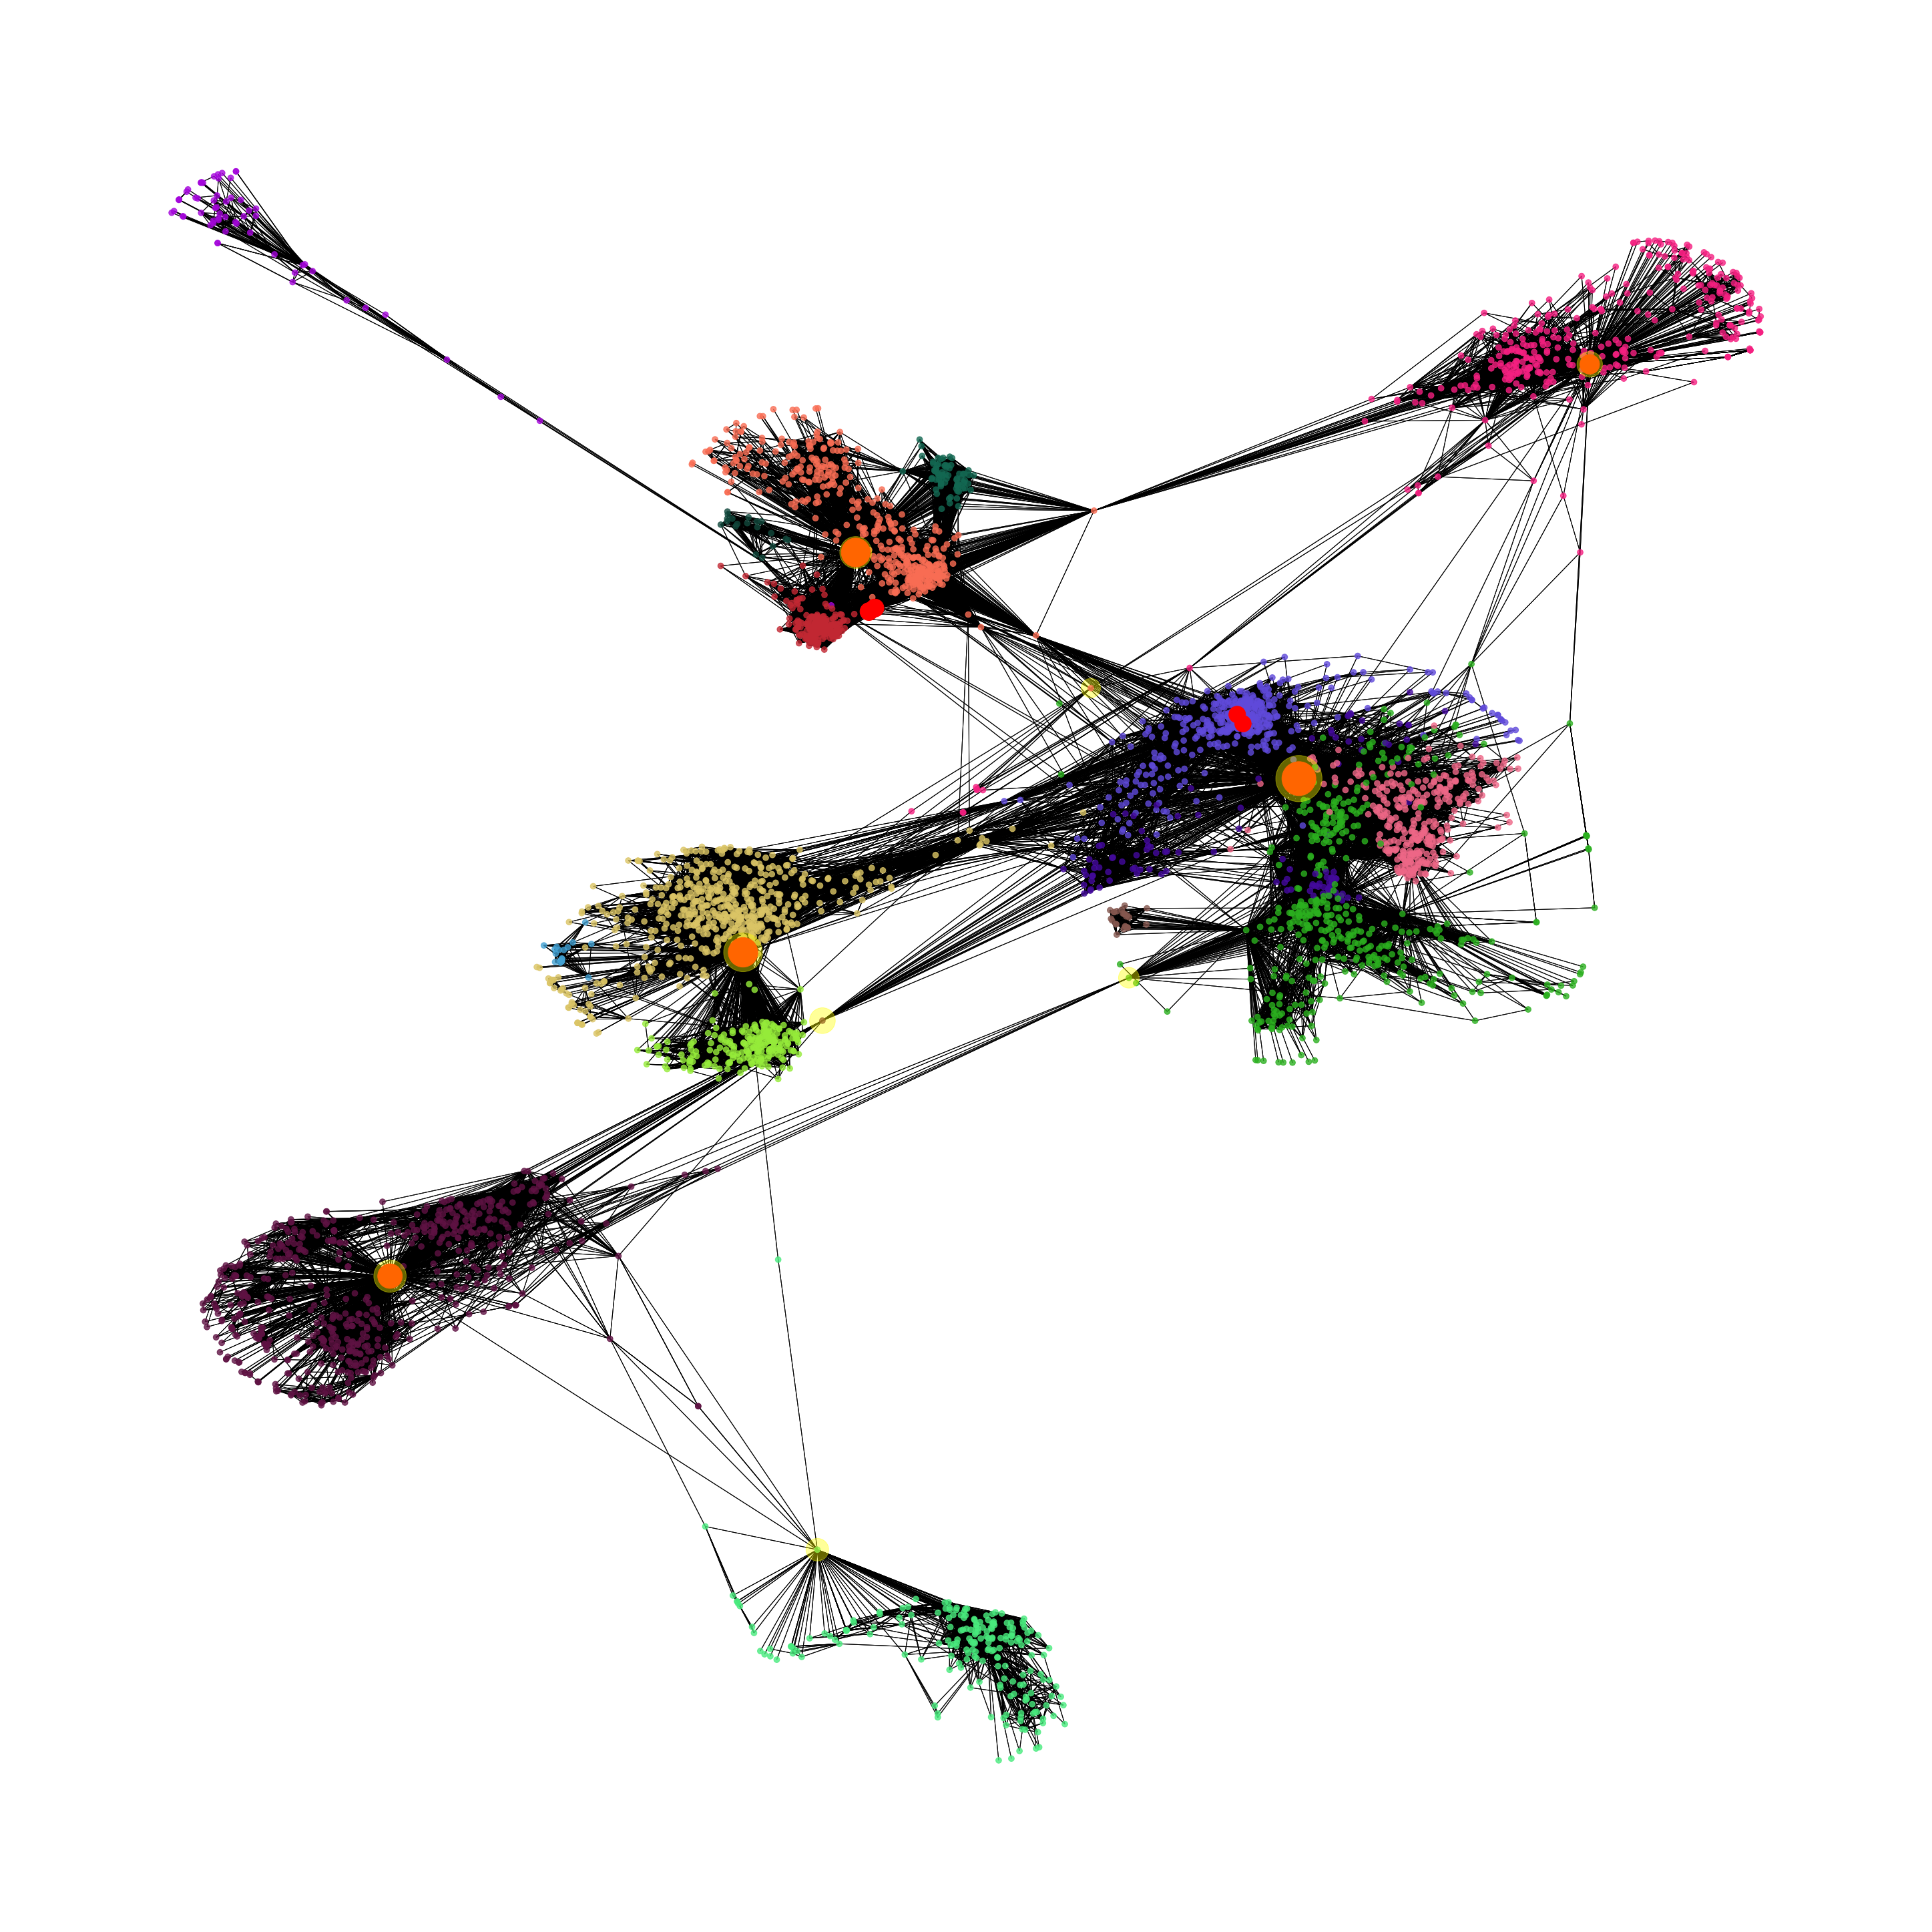

In [30]:
node_cmap = [colors[v] for _,v in communities.items()]

plt.figure(figsize=[40,40])
pos = nx.spring_layout(G)
nx.draw(G, pos, alpha = 0.8, node_color=node_cmap,node_size=75)
nx.draw(G,pos,alpha=1,nodelist=list(sorted_influ.index),node_color="red",node_size = [ int(l*10000) for l in sorted_influ.centrality])
nx.draw(G,pos,alpha=0.4,nodelist=list(sorted_br.index),node_color="yellow",node_size = [ int(l*10000) for l in sorted_br.centrality])
plt.show()

In [31]:
nx.set_node_attributes(G, communities, 'group')

In [32]:
# com_net = Network( bgcolor='#222222', font_color='white')
# com_net.from_nx(G)
# com_net.show("facebook_communities.html")